In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [13]:
data = pd.read_csv("diabetes_cleaned.csv")
# Make a copy to avoid altering orginal data
encoded_data = data.copy()

In [14]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,No,0,0,1,0,...,1,0,3,5,30,0,Male,4,6,8
1,0,1,1,1,26,Yes,1,0,0,1,...,1,0,3,0,0,0,Male,12,6,8
2,0,0,0,1,26,No,0,0,1,1,...,1,0,1,0,10,0,Male,13,6,8
3,0,1,1,1,28,Yes,0,0,1,1,...,1,0,3,0,3,0,Male,11,6,8
4,0,0,0,1,29,Yes,0,0,1,1,...,1,0,2,0,0,0,Male,8,5,8


In [15]:
# Identify object(categorical) columns
categorical_cols = encoded_data.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Smoker', 'Sex'], dtype='object')


In [16]:
# Apply Label Encoding for all categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

In [21]:
encoded_data.head(5)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,1,8,5,8


In [22]:

encoded_data.to_csv("categorical_cleaned.csv", index=False)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Compute correlation matrix
corr_matrix = encoded_data.corr()

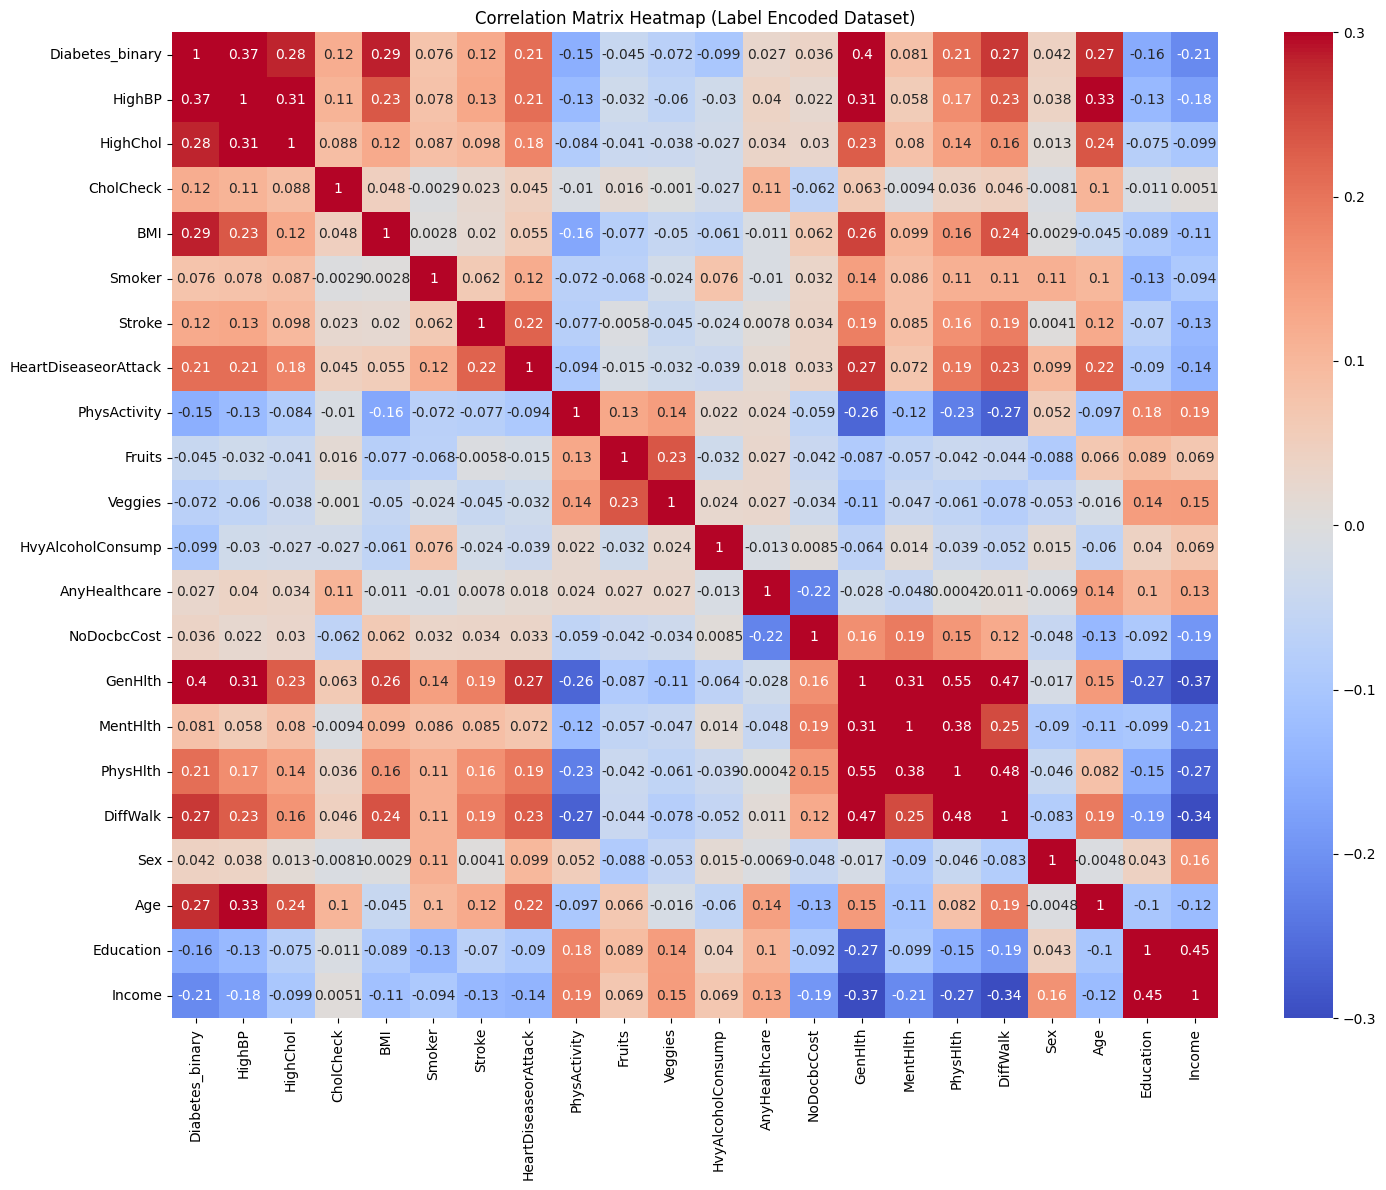

In [20]:

# Plot correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=True,        # show numbers for easier reading
    cmap="coolwarm",
    center=0,
    vmin=-0.3, vmax=0.3 # narrow the color range to highlight small differences
)
plt.title("Correlation Matrix Heatmap (Label Encoded Dataset)")
plt.tight_layout()
plt.show()
